In [1]:
!pip install featuretools

In [1]:
import featuretools as ft
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3> DATA CLEANING </h3>


In [60]:
dataset = pd.read_csv('../Data/loan.csv',low_memory=False)


In [61]:
dataset.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [62]:
dataset.isna().sum()
columns_with_most_nulls = []
columns_with_data=[]
for key,null_value in (dataset.isnull().sum()/len(dataset)*100).sort_values().iteritems():
    if null_value > 75:
        columns_with_most_nulls.append(key)
    else:
        columns_with_data.append(key)
print("No of columns with more than 50% missing data: ",columns_with_most_nulls)
print("No of columns with considerable amount of data: ",columns_with_data)

No of columns with more than 50% missing data:  ['mths_since_last_major_derog', 'mths_since_last_record', 'desc', 'inq_last_12m', 'inq_fi', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'total_cu_tl', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'mths_since_rcnt_il', 'il_util', 'annual_inc_joint', 'verification_status_joint', 'dti_joint']
No of columns with considerable amount of data:  ['id', 'addr_state', 'dti', 'revol_bal', 'initial_list_status', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code', 'application_type', 'zip_code', 'purpose', 'out_prncp', 'funded_amnt', 'pymnt_plan', 'member_id', 'loan_status', 'issue_d', 'verification_status', 'loan_amnt', 'url', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'acc_now_delinq', 'delinq_2yrs', 'pub_rec', 'op

In [63]:
dataset_columns_with_data = dataset[columns_with_data]

In [64]:
dataset_columns_with_data.isna().sum()

id                                 0
addr_state                         0
dti                                0
revol_bal                          0
initial_list_status                0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
policy_code                        0
application_type                   0
zip_code                           0
purpose                            0
out_prncp                          0
funded_amnt                        0
pymnt_plan                         0
member_id                          0
loan_status                        0
issue_d                            0
verification_status                0
loan_amnt                          0
url                                0
f

<h4>Droping unwanted features</h4>
1.we are droping features like "next_pymnt_d","last_pymnt_d","tot_coll_amt","tot_cur_bal" that will generate after a loan is started, so they have no effect on prediction of interest rates <br>
2.we are also dropping "emp_title" feature since borrowers economic strength is collectively dependent on annual income and employment length


In [65]:
dataset_columns_with_data.drop(columns=["last_pymnt_d","emp_title","tot_coll_amt","tot_cur_bal","next_pymnt_d"],inplace=True)

In [66]:
dataset_columns_with_data

,id,addr_state,dti,revol_bal,initial_list_status,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,inq_last_6mths,total_acc,earliest_cr_line,last_credit_pull_d,collections_12_mths_ex_med,title,revol_util,emp_length,total_rev_hi_lim,mths_since_last_delinq
0,1077501,AZ,27.65,13648.0,f,0.00,5861.071414,5831.78,5000.00,861.07,...,1.0,9.0,Jan-1985,Jan-2016,0.0,Computer,83.70,10+ years,NaN,NaN
1,1077430,GA,1.00,1687.0,f,0.00,1008.710000,1008.71,456.46,435.17,...,5.0,4.0,Apr-1999,Sep-2013,0.0,bike,9.40,< 1 year,NaN,NaN
2,1077175,IL,8.72,2956.0,f,0.00,3003.653644,3003.65,2400.00,603.65,...,2.0,10.0,Nov-2001,Jan-2016,0.0,real estate business,98.50,10+ years,NaN,NaN
3,1076863,CA,20.00,5598.0,f,0.00,12226.302212,12226.30,10000.00,2209.33,...,1.0,37.0,Feb-1996,Jan-2015,0.0,personel,21.00,10+ years,NaN,35.0
4,1075358,OR,17.94,27783.0,f,766.90,3242.170000,3242.17,2233.10,1009.07,...,0.0,38.0,Jan-1996,Jan-2016,0.0,Personal,53.90,1 year,NaN,38.0
5,1075269,AZ,11.20,7963.0,f,0.00,5631.377753,5631.38,5000.00,631.38,...,3.0,12.0,Nov-2004,Sep-2015,0.0,My wedding loan I promise to pay back,28.30,3 years,NaN,NaN
6,1069639,NC,23.51,17726.0,f,1889.15,8136.840000,8136.84,5110.85,3025.99,...,1.0,11.0,Jul-2005,Jan-2016,0.0,Loan,85.60,8 years,NaN,NaN
7,1072053,CA,5.35,8221.0,f,0.00,3938.144334,3938.14,3000.00,938.14,...,2.0,4.0,Jan-2007,Dec-2014,0.0,Car Downpayment,87.50,9 years,NaN,NaN
8,1071795,CA,5.55,5210.0,f,0.00,646.020000,646.02,162.02,294.94,...,2.0,13.0,Apr-2004,Aug-2012,0.0,Expand Business & Buy Debt Portfolio,32.60,4 years,NaN,NaN
9,1071570,TX,18.08,9279.0,f,0.00,1476.190000,1469.34,673.48,533.42,...,0.0,3.0,Sep-2004,Mar-2013,0.0,Building my credit history.,36.50,< 1 year,NaN,NaN


In [67]:
numerical_data = dataset_columns_with_data.select_dtypes(include = ['int64','float'])
categorical_data = dataset_columns_with_data.select_dtypes(include = ['object'])

In [68]:
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

In [69]:
dataset_columns_with_data[numerical_features].isna().sum()

id                                 0
dti                                0
revol_bal                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
policy_code                        0
out_prncp                          0
funded_amnt                        0
member_id                          0
loan_amnt                          0
funded_amnt_inv                    0
int_rate                           0
installment                        0
annual_inc                         4
acc_now_delinq                    29
delinq_2yrs                       29
pub_rec                           29
open_acc                          29
inq_last_6mths                    29
total_acc                         29
c

<h3>Handling Missing numerical data</h3>

In [70]:
#records which do not have column data like "annual_inc","acc_now_delinq","pub_rec","open_acc","inq_last_6mths","total_acc","collections_12_mths_ex_med","revol_util" are very less in number, so we will remove those records
dataset_columns_with_data.dropna(axis=0,subset=["annual_inc","acc_now_delinq","pub_rec","open_acc","inq_last_6mths","total_acc","collections_12_mths_ex_med","revol_util"],inplace=True)

In [71]:
dataset_columns_with_data[["total_rev_hi_lim","mths_since_last_delinq"]].describe()

,total_rev_hi_lim,mths_since_last_delinq
count,8.167220e+05,432682.000000
mean,3.207709e+04,34.073953
std,3.749254e+04,21.883753
min,0.000000e+00,0.000000
25%,1.400000e+04,15.000000
50%,2.370000e+04,31.000000
75%,3.980000e+04,50.000000
max,9.999999e+06,188.000000


In [72]:
dataset_columns_with_data.corr()

,id,dti,revol_bal,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,...,acc_now_delinq,delinq_2yrs,pub_rec,open_acc,inq_last_6mths,total_acc,collections_12_mths_ex_med,revol_util,total_rev_hi_lim,mths_since_last_delinq
id,1.000000,0.067609,0.036407,0.558553,-0.597574,-0.593161,-0.556603,-0.462330,-0.075830,-0.114402,...,0.016873,0.049649,0.080084,0.088483,-0.126782,0.031270,0.051314,-0.055253,0.048735,-0.008941
dti,0.067609,1.000000,0.067299,0.059174,-0.041556,-0.040416,-0.052080,0.008347,-0.005647,0.001176,...,0.003226,-0.002828,-0.022981,0.144126,-0.008045,0.107946,-0.000295,0.087817,0.032915,0.001311
revol_bal,0.036407,0.067299,1.000000,0.232198,0.138294,0.137734,0.120160,0.137446,0.002929,0.010814,...,-0.000837,-0.032436,-0.100734,0.224578,-0.017529,0.189163,-0.022871,0.216249,0.821106,-0.026911
out_prncp_inv,0.558553,0.059174,0.232198,1.000000,-0.287098,-0.283656,-0.369736,0.112341,-0.032992,-0.110897,...,0.012351,0.031652,-0.007759,0.171682,-0.106685,0.137854,0.016065,0.074432,0.222650,-0.036984
total_pymnt,-0.597574,-0.041556,0.138294,-0.287098,1.000000,0.997648,0.970042,0.681670,0.056297,0.038410,...,-0.008480,-0.031825,-0.087913,0.042601,0.077795,0.109078,-0.039016,0.081857,0.119391,-0.007602
total_pymnt_inv,-0.593161,-0.040416,0.137734,-0.283656,0.997648,1.000000,0.967557,0.680970,0.053453,0.037012,...,-0.008241,-0.031389,-0.087157,0.043807,0.074074,0.110020,-0.038666,0.083070,0.119400,-0.005375
total_rec_prncp,-0.556603,-0.052080,0.120160,-0.369736,0.970042,0.967557,1.000000,0.489336,0.033109,-0.037703,...,-0.010821,-0.038312,-0.084531,0.031151,0.062470,0.099947,-0.038149,0.037444,0.118184,0.000561
total_rec_int,-0.462330,0.008347,0.137446,0.112341,0.681670,0.680970,0.489336,1.000000,0.090439,0.067842,...,0.002212,0.001696,-0.060109,0.061240,0.085738,0.091896,-0.024996,0.183473,0.072075,-0.028363
total_rec_late_fee,-0.075830,-0.005647,0.002929,-0.032992,0.056297,0.053453,0.033109,0.090439,1.000000,0.073675,...,0.003148,0.017327,-0.011424,-0.009440,0.031302,-0.004812,-0.003060,0.022192,-0.005200,-0.021045
recoveries,-0.114402,0.001176,0.010814,-0.110897,0.038410,0.037012,-0.037703,0.067842,0.073675,1.000000,...,0.000721,-0.000716,-0.014480,0.001590,0.045586,0.009396,-0.004787,0.028560,0.000014,-0.004543


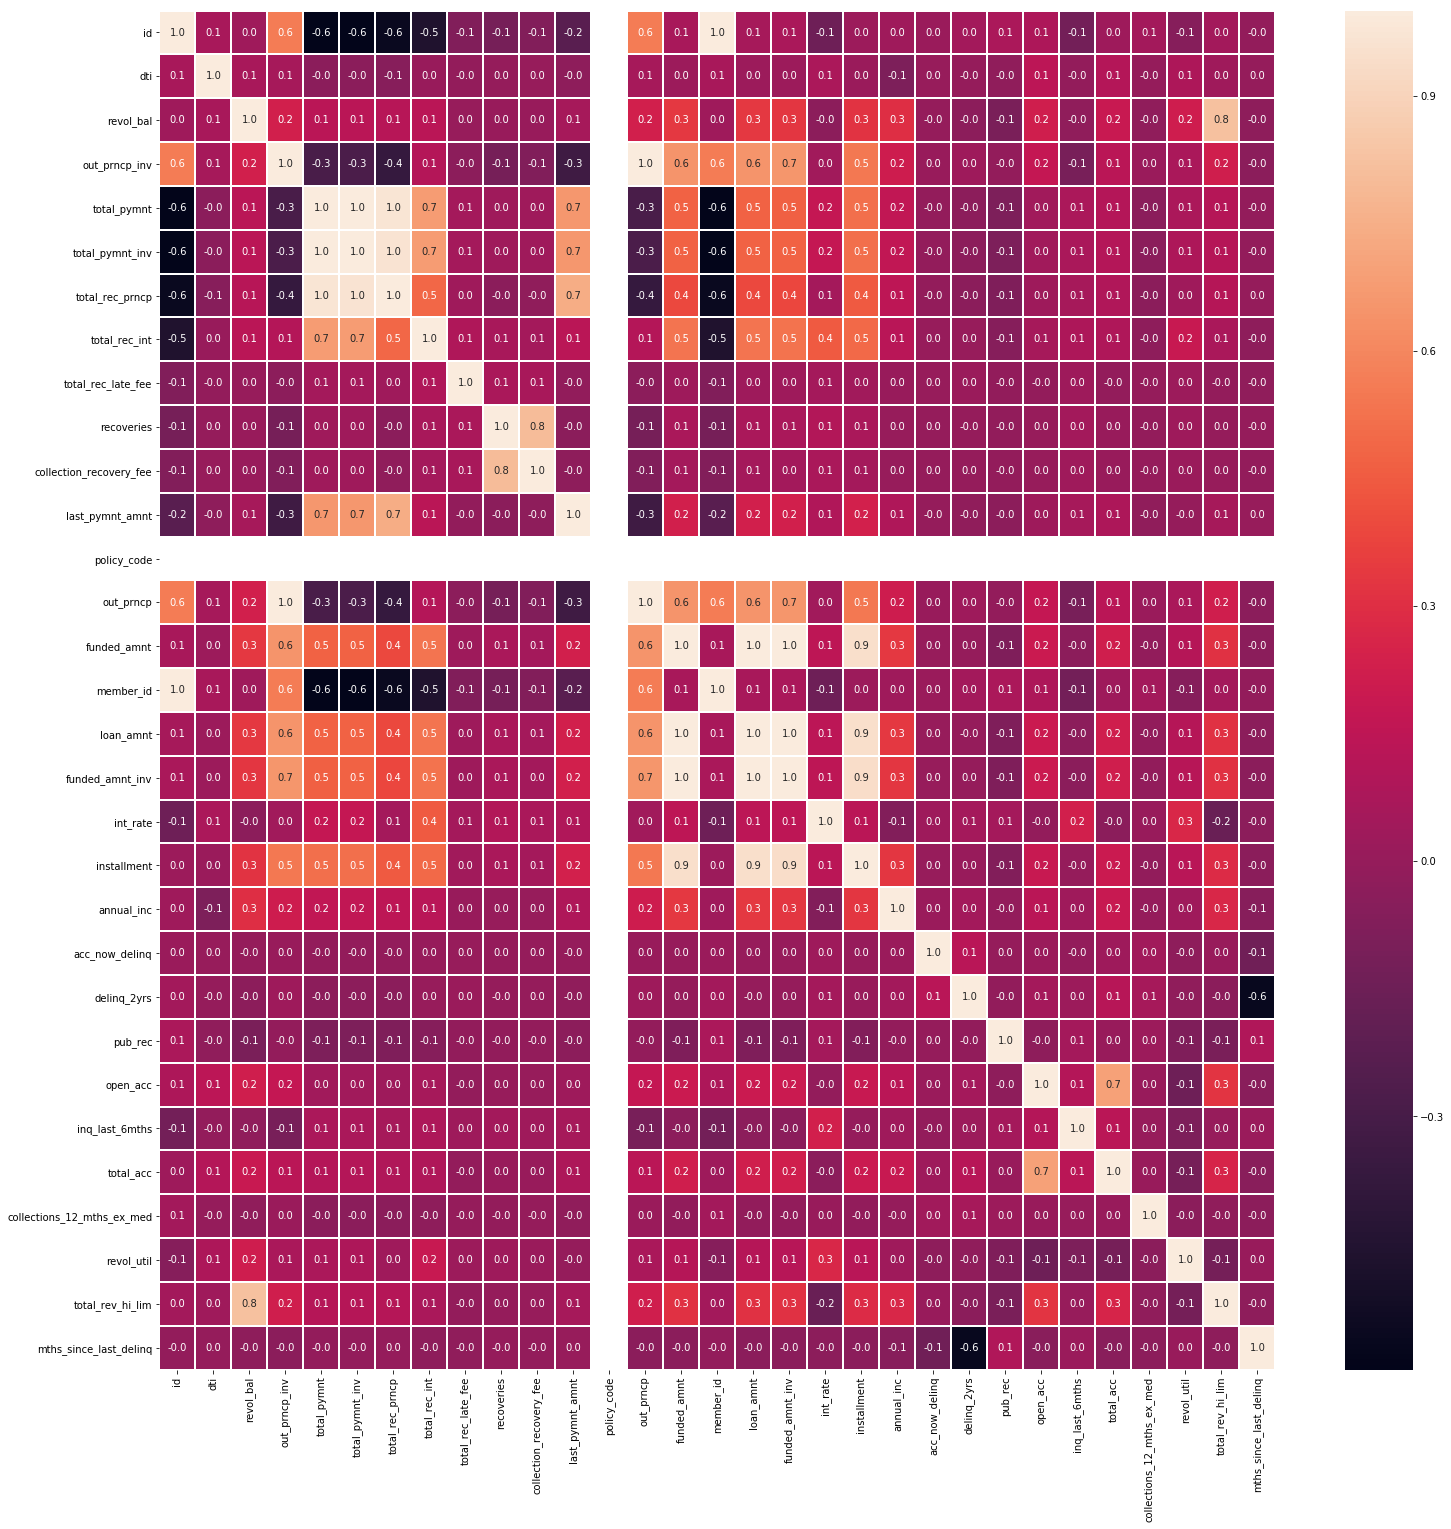

In [73]:
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(dataset_columns_with_data.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()


<h4>Removing highly collinear features</h4>


In [74]:
highly_collinear_features=["total_pymnt_inv","total_rec_prncp","funded_amnt_inv","funded_amnt"]

In [75]:
dataset_columns_with_data.drop(columns=highly_collinear_features,inplace=True)

Removing non ordinal features

In [76]:
numerical_data = dataset_columns_with_data.select_dtypes(include = ['int64','float'])
categorical_data = dataset_columns_with_data.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

In [77]:
print(len(numerical_features),len(categorical_features))

27 18


In [78]:
dataset_columns_with_data.corr()['int_rate'].sort_values(ascending=False)

int_rate                      1.000000
total_rec_int                 0.445767
revol_util                    0.269090
inq_last_6mths                0.227977
total_pymnt                   0.170555
loan_amnt                     0.145040
installment                   0.133064
recoveries                    0.106830
last_pymnt_amnt               0.101188
dti                           0.079950
collection_recovery_fee       0.070885
total_rec_late_fee            0.057131
delinq_2yrs                   0.055111
pub_rec                       0.052226
out_prncp                     0.042668
out_prncp_inv                 0.042525
acc_now_delinq                0.026480
collections_12_mths_ex_med    0.013360
open_acc                     -0.010047
mths_since_last_delinq       -0.030126
revol_bal                    -0.035604
total_acc                    -0.038554
annual_inc                   -0.072848
member_id                    -0.142296
id                           -0.143053
total_rev_hi_lim         

In [79]:
dataset_columns_with_data.isna().sum()

id                                 0
addr_state                         0
dti                                0
revol_bal                          0
initial_list_status                0
out_prncp_inv                      0
total_pymnt                        0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
policy_code                        0
application_type                   0
zip_code                           0
purpose                            0
out_prncp                          0
pymnt_plan                         0
member_id                          0
loan_status                        0
issue_d                            0
verification_status                0
loan_amnt                          0
url                                0
term                               0
int_rate                           0
installment                        0
g

In [80]:
#removing some more highly collinear features
dataset_columns_with_data.drop(columns=["total_rev_hi_lim","collection_recovery_fee","out_prncp_inv","total_acc","mths_since_last_delinq"],inplace=True)

In [81]:
dataset_columns_with_data.isna().sum()

id                                0
addr_state                        0
dti                               0
revol_bal                         0
initial_list_status               0
total_pymnt                       0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
last_pymnt_amnt                   0
policy_code                       0
application_type                  0
zip_code                          0
purpose                           0
out_prncp                         0
pymnt_plan                        0
member_id                         0
loan_status                       0
issue_d                           0
verification_status               0
loan_amnt                         0
url                               0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
home_ownership              

In [82]:
#removing user filled data like title for the loan since we will know the purpose
dataset_columns_with_data.drop(columns=["title"],inplace=True)

In [83]:
dataset_columns_with_data["emp_length"]=dataset_columns_with_data["emp_length"].fillna(0)

In [84]:
dataset_columns_with_data.dropna(axis=0,subset=["last_credit_pull_d"],inplace=True)

In [85]:
numerical_data = dataset_columns_with_data.select_dtypes(include = ['int64','float'])
categorical_data = dataset_columns_with_data.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

In [86]:
#checking if any data is left unhandled
dataset_columns_with_data.isna().sum()

id                            0
addr_state                    0
dti                           0
revol_bal                     0
initial_list_status           0
total_pymnt                   0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
last_pymnt_amnt               0
policy_code                   0
application_type              0
zip_code                      0
purpose                       0
out_prncp                     0
pymnt_plan                    0
member_id                     0
loan_status                   0
issue_d                       0
verification_status           0
loan_amnt                     0
url                           0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
acc_now_delinq                0
delinq_2yrs                   0
pub_rec 

In [87]:
#generating clean data
dataset_columns_with_data.to_csv("../Data/dataclean.csv")

In [88]:
dataset_columns_with_data.shape

(886713, 39)

Handling categorical data

In [89]:
categorical_features

array(['addr_state', 'initial_list_status', 'application_type',
       'zip_code', 'purpose', 'pymnt_plan', 'loan_status', 'issue_d',
       'verification_status', 'url', 'term', 'grade', 'sub_grade',
       'home_ownership', 'earliest_cr_line', 'last_credit_pull_d',
       'emp_length'], dtype=object)

In [90]:
numerical_features

array(['id', 'dti', 'revol_bal', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'policy_code', 'out_prncp', 'member_id', 'loan_amnt', 'int_rate',
       'installment', 'annual_inc', 'acc_now_delinq', 'delinq_2yrs',
       'pub_rec', 'open_acc', 'inq_last_6mths',
       'collections_12_mths_ex_med', 'revol_util'], dtype=object)

In [91]:
dataset_columns_with_data[numerical_features].corr()['int_rate'].sort_values(ascending =False)

int_rate                      1.000000
total_rec_int                 0.445779
revol_util                    0.269078
inq_last_6mths                0.227997
total_pymnt                   0.170574
loan_amnt                     0.145056
installment                   0.133079
recoveries                    0.106831
last_pymnt_amnt               0.101195
dti                           0.079944
total_rec_late_fee            0.057132
delinq_2yrs                   0.055102
pub_rec                       0.052217
out_prncp                     0.042668
acc_now_delinq                0.026480
collections_12_mths_ex_med    0.013358
open_acc                     -0.010048
revol_bal                    -0.035604
annual_inc                   -0.072845
member_id                    -0.142316
id                           -0.143072
policy_code                        NaN
Name: int_rate, dtype: float64

In [92]:
#removing installment as it is highly collinear with loan_amount
dataset_columns_with_data.drop(columns=["installment"],inplace=True)

In [93]:
# policy_code as it does not have any correlation with interest rate
dataset_columns_with_data.drop(columns=["policy_code"],inplace=True)

In [94]:
numerical_data = dataset_columns_with_data.select_dtypes(include = ['int64','float'])
categorical_data = dataset_columns_with_data.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

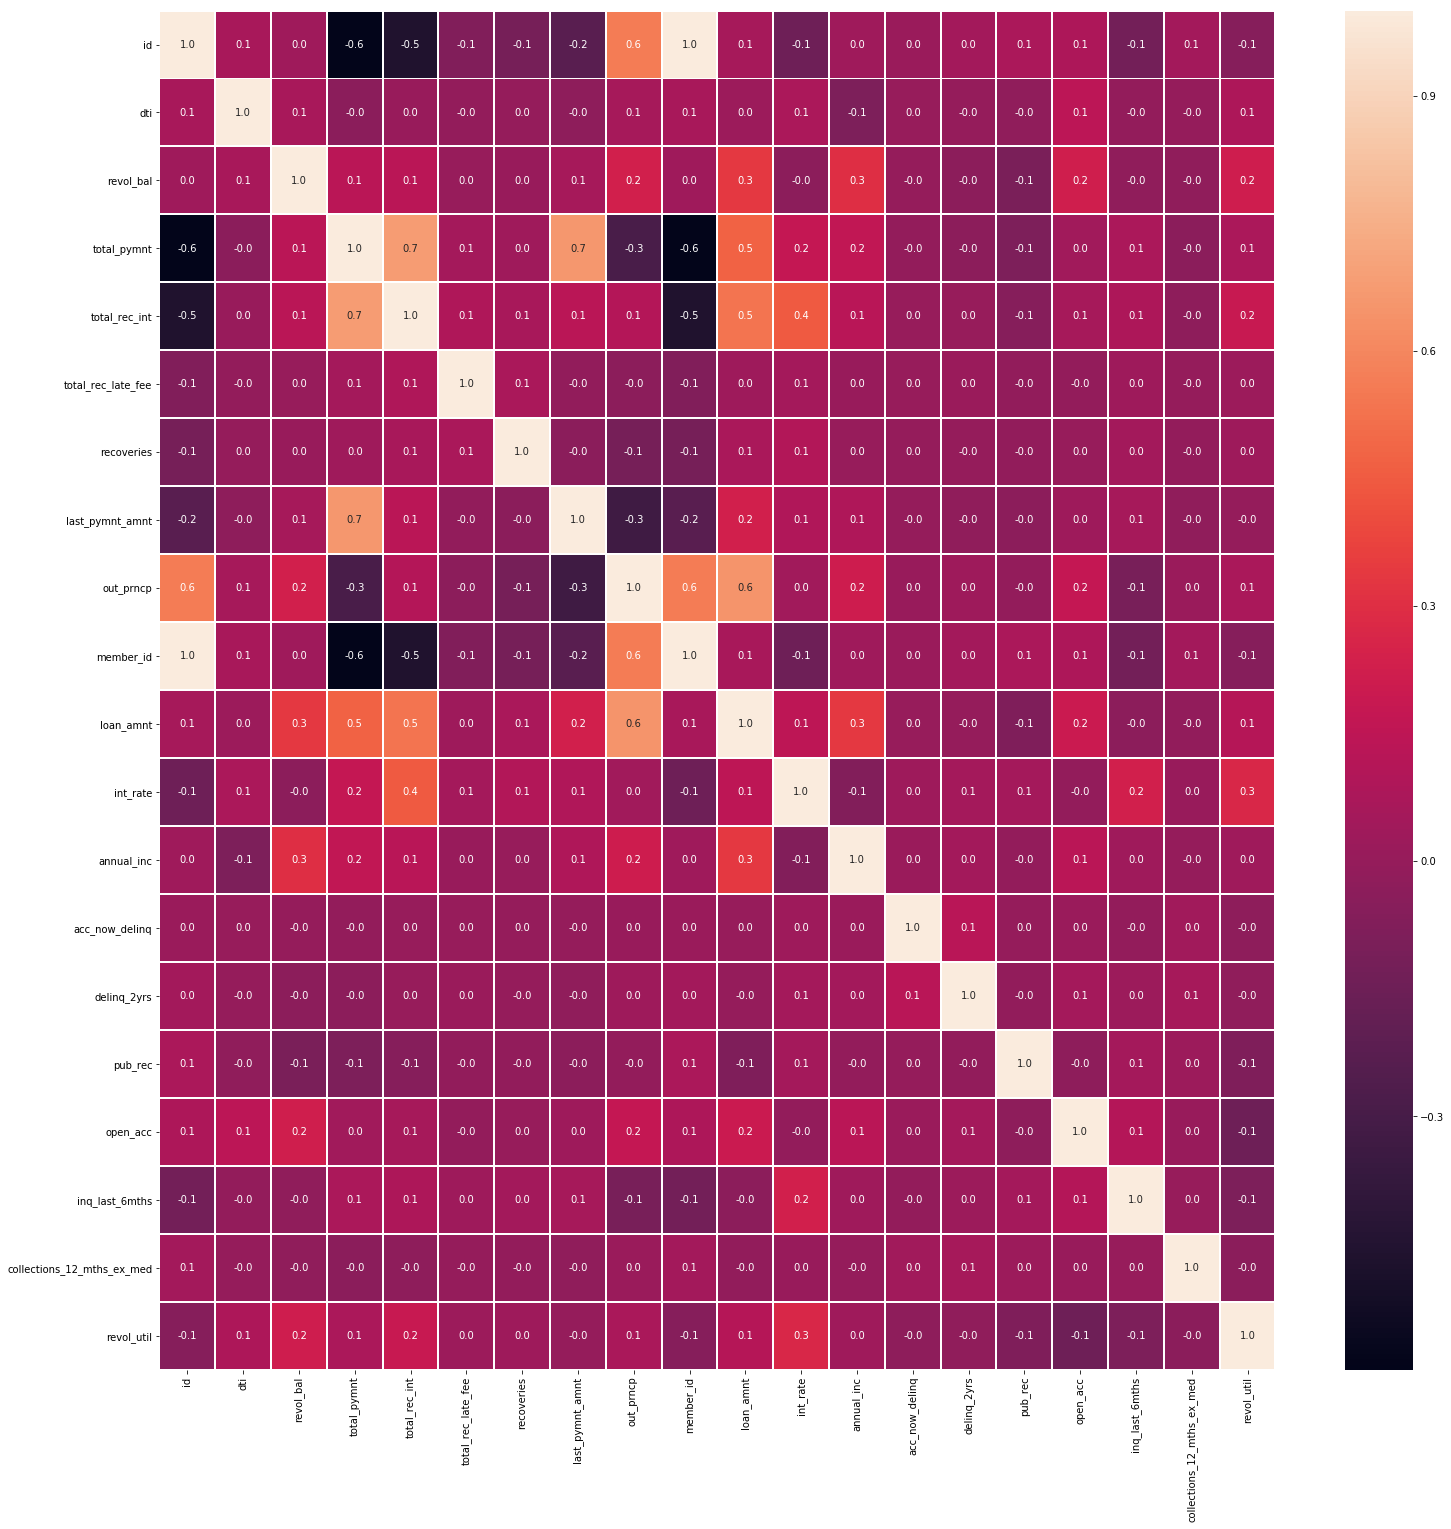

In [95]:
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(dataset_columns_with_data.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

In [96]:
dataset_columns_with_data.corr()['int_rate'].sort_values(ascending=False)

int_rate                      1.000000
total_rec_int                 0.445779
revol_util                    0.269078
inq_last_6mths                0.227997
total_pymnt                   0.170574
loan_amnt                     0.145056
recoveries                    0.106831
last_pymnt_amnt               0.101195
dti                           0.079944
total_rec_late_fee            0.057132
delinq_2yrs                   0.055102
pub_rec                       0.052217
out_prncp                     0.042668
acc_now_delinq                0.026480
collections_12_mths_ex_med    0.013358
open_acc                     -0.010048
revol_bal                    -0.035604
annual_inc                   -0.072845
member_id                    -0.142316
id                           -0.143072
Name: int_rate, dtype: float64

<h3>Handling Categorical Data</h3>

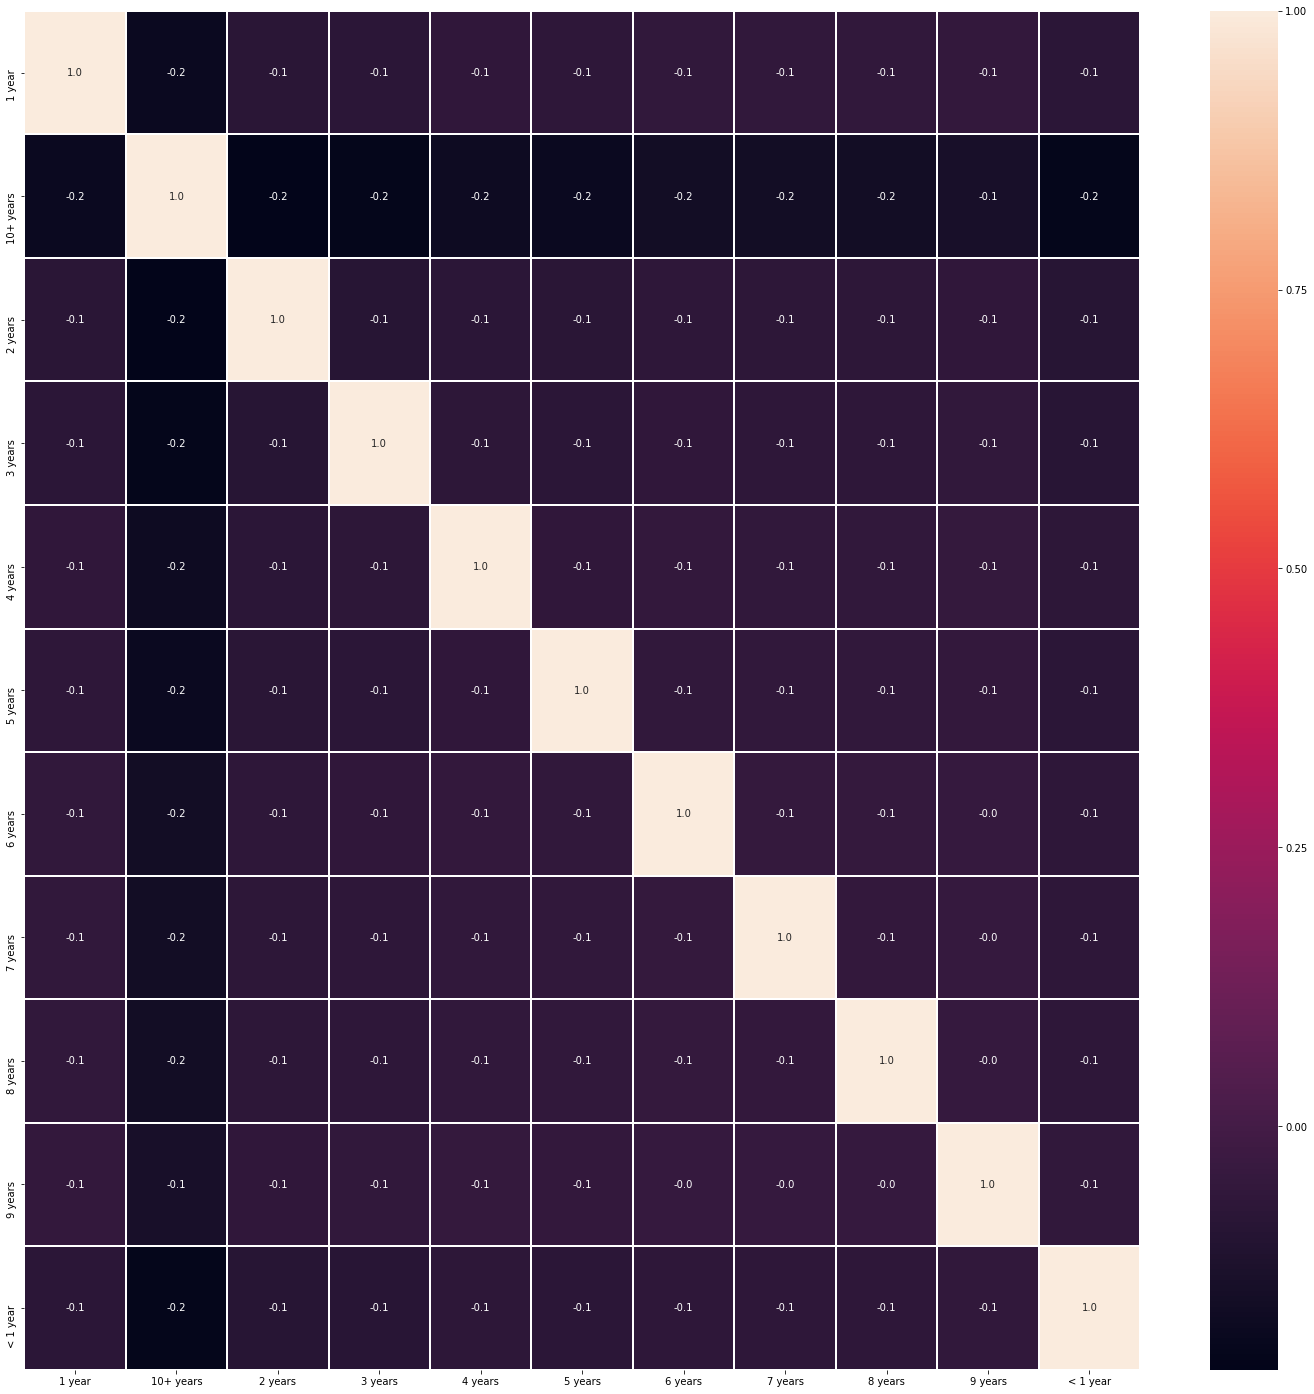

In [97]:
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(pd.get_dummies(dataset_columns_with_data["emp_length"],drop_first=True).corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()


In [98]:
len(numerical_features)
print(numerical_features)

['id' 'dti' 'revol_bal' 'total_pymnt' 'total_rec_int' 'total_rec_late_fee'
 'recoveries' 'last_pymnt_amnt' 'out_prncp' 'member_id' 'loan_amnt'
 'int_rate' 'annual_inc' 'acc_now_delinq' 'delinq_2yrs' 'pub_rec'
 'open_acc' 'inq_last_6mths' 'collections_12_mths_ex_med' 'revol_util']


In [99]:
len(categorical_features)
print(categorical_features)

['addr_state' 'initial_list_status' 'application_type' 'zip_code'
 'purpose' 'pymnt_plan' 'loan_status' 'issue_d' 'verification_status'
 'url' 'term' 'grade' 'sub_grade' 'home_ownership' 'earliest_cr_line'
 'last_credit_pull_d' 'emp_length']


<h3> Handling categorical values </h3>

<ul>Ordinal Values
<li>grade</li>
<li>emp_length</li>
</ul>
<ul>Nominal Values
<li>home_ownership</li>
<li>verification_status</li>
<li>purpose</li>
<li>term</li>
<li>addr_state</li>
</ul>

In [100]:
# we will remove columns :URL,pymnt_plan, loan_status, zip_code - as these columns hold less significance in intrest rate calculation
dataset_columns_with_data.drop(columns =['url','loan_status','zip_code','pymnt_plan'], inplace=True)

In [101]:
#we noticed that first row's values for both earliest_cr_line and last_credit_pull_d columns contain date values that would require a good amount of feature engineering for them to be potentially useful:
# earliest_cr_line — The month the borrower's earliest reported credit line was opened
# last_credit_pull_d — The most recent month Lending Club pulled credit for this loan
# We'll remove these date columns from the DataFrame.
dataset_columns_with_data.drop(columns =['issue_d','initial_list_status','earliest_cr_line','last_credit_pull_d'], inplace=True)

In [102]:
numerical_data = dataset_columns_with_data.select_dtypes(include = ['int64','float'])
categorical_data = dataset_columns_with_data.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

In [103]:
print(numerical_features)

['id' 'dti' 'revol_bal' 'total_pymnt' 'total_rec_int' 'total_rec_late_fee'
 'recoveries' 'last_pymnt_amnt' 'out_prncp' 'member_id' 'loan_amnt'
 'int_rate' 'annual_inc' 'acc_now_delinq' 'delinq_2yrs' 'pub_rec'
 'open_acc' 'inq_last_6mths' 'collections_12_mths_ex_med' 'revol_util']


In [104]:
sub_grades=[]
for key in dataset_columns_with_data.sub_grade.value_counts().to_dict().keys():
    sub_grades.append(key)

In [105]:
sorted(sub_grades)

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

In [106]:
dataset_columns_with_data.reset_index(drop=True,inplace=True)

In [107]:
dataset_columns_with_data.drop(columns=['grade'],inplace=True)

In [108]:
dataset_columns_with_data['id']=np.arange(0,dataset_columns_with_data.shape[0],1)

In [109]:
dataset_columns_with_data.columns

Index(['id', 'addr_state', 'dti', 'revol_bal', 'total_pymnt', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt',
       'application_type', 'purpose', 'out_prncp', 'member_id',
       'verification_status', 'loan_amnt', 'term', 'int_rate', 'sub_grade',
       'home_ownership', 'annual_inc', 'acc_now_delinq', 'delinq_2yrs',
       'pub_rec', 'open_acc', 'inq_last_6mths', 'collections_12_mths_ex_med',
       'revol_util', 'emp_length'],
      dtype='object')

In [110]:
# Removing records according to grades above 4, sub_grades above 18, and verifiication status
ordinal_features_map = {
   "emp_length": {
       "10+ years": 10,
       "9 years": 9,
       "8 years": 8,
       "7 years": 7,
       "6 years": 6,
       "5 years": 5,
       "4 years": 4,
       "3 years": 3,
       "2 years": 2,
       "1 year": 1,
       "< 1 year": 0,
       "n/a": 0

   },
   "grade":{
       "A": 1,
       "B": 2,
       "C": 3,
       "D": 4,
       "E": 5,
       "F": 6,
       "G": 7
   },
   "sub_grade":{
       'A1':1,
       'A2':2,
       'A3':3,
       'A4':4,
       'A5':5,
       'B1':6,
       'B2':7,
       'B3':8,
       'B4':9,
       'B5':10,
       'C1':11,
       'C2':12,
       'C3':13,
       'C4':14,
       'C5':15,
       'D1':16,
       'D2':17,
       'D3':18,
       'D4':19,
       'D5':20,
       'E1':21,
       'E2':22,
       'E3':23,
       'E4':24,
       'E5':25,
       'F1':26,
       'F2':27,
       'F3':28,
       'F4':29,
       'F5':30,
       'G1':31,
       'G2':32,
       'G3':33,
       'G4':34,
       'G5':35
   }
}
dataset_columns_with_data=dataset_columns_with_data.replace(ordinal_features_map)
#dataset_columns_with_data.drop(dataset_columns_with_data[dataset_columns_with_data.grade > 4].index, inplace=True)
dataset_columns_with_data.drop(dataset_columns_with_data[dataset_columns_with_data.sub_grade > 18].index, inplace=True)
dataset_columns_with_data.drop(dataset_columns_with_data[dataset_columns_with_data.verification_status !='Verified'].index, inplace=True)
dataset_columns_with_data['loan_income_ratio']= (dataset_columns_with_data['loan_amnt']/dataset_columns_with_data['annual_inc'])*100
dataset_columns_with_data.drop(dataset_columns_with_data[dataset_columns_with_data.loan_income_ratio > 30].index, inplace=True)
unwanted_variables = ['total_rec_int', 'total_rec_late_fee','recoveries','last_pymnt_amnt','out_prncp','collections_12_mths_ex_med','verification_status']
for variable in unwanted_variables:
    dataset_columns_with_data.drop([variable], axis=1, inplace=True)

In [111]:
dataset_columns_with_data

,id,addr_state,dti,revol_bal,total_pymnt,application_type,purpose,member_id,loan_amnt,term,...,home_ownership,annual_inc,acc_now_delinq,delinq_2yrs,pub_rec,open_acc,inq_last_6mths,revol_util,emp_length,loan_income_ratio
0,0,AZ,27.65,13648.0,5861.071414,INDIVIDUAL,credit_card,1296599,5000.0,36 months,...,RENT,24000.0,0.0,0.0,0.0,3.0,1.0,83.70,10,20.833333
18,18,UT,18.44,0.0,7164.499852,INDIVIDUAL,medical,1294539,6000.0,36 months,...,MORTGAGE,84000.0,0.0,2.0,0.0,4.0,0.0,37.73,1,7.142857
21,21,FL,13.22,32135.0,14025.400000,INDIVIDUAL,debt_consolidation,1269083,21000.0,36 months,...,RENT,105000.0,0.0,0.0,0.0,7.0,0.0,90.30,10,20.000000
25,25,IL,29.44,13707.0,15823.480000,INDIVIDUAL,credit_card,1273773,15000.0,36 months,...,MORTGAGE,92000.0,0.0,0.0,0.0,8.0,0.0,93.90,2,16.304348
33,33,OR,11.93,2224.0,5714.592129,INDIVIDUAL,debt_consolidation,1304289,5000.0,36 months,...,RENT,24044.0,0.0,0.0,0.0,8.0,0.0,29.30,2,20.795209
51,51,CA,15.71,26088.0,29695.622676,INDIVIDUAL,credit_card,1302485,25600.0,36 months,...,RENT,110000.0,0.0,0.0,0.0,11.0,0.0,62.00,9,23.272727
59,59,TX,24.00,6021.0,9079.334843,INDIVIDUAL,debt_consolidation,1287308,7100.0,36 months,...,MORTGAGE,33000.0,0.0,0.0,0.0,4.0,2.0,91.20,1,21.515152
64,64,OH,21.73,11170.0,8772.910000,INDIVIDUAL,debt_consolidation,1303778,10000.0,60 months,...,RENT,45996.0,0.0,0.0,0.0,7.0,1.0,30.10,10,21.741021
69,69,FL,11.88,19397.0,18562.400420,INDIVIDUAL,credit_card,1303718,15000.0,36 months,...,OWN,61000.0,0.0,0.0,0.0,8.0,1.0,79.50,2,24.590164
76,76,TX,21.82,11382.0,13413.216045,INDIVIDUAL,debt_consolidation,1303482,11000.0,36 months,...,MORTGAGE,48000.0,0.0,0.0,0.0,15.0,3.0,65.00,10,22.916667


In [161]:
# creating and entity set 'es'
interest_rates=dataset_columns_with_data.pop('int_rate')
es = ft.EntitySet(id = 'loan_interest')

# adding a dataframe
es.entity_from_dataframe(entity_id = 'lending_club_loans', dataframe = dataset_columns_with_data, index = 'id')

Entityset: loan_interest
  Entities:
    lending_club_loans [Rows: 157932, Columns: 21]
  Relationships:
    No relationships

In [162]:
es.normalize_entity(base_entity_id='lending_club_loans', new_entity_id='borrower', index = 'member_id',
additional_variables = ['loan_income_ratio','dti', 'revol_bal', 'annual_inc', 'acc_now_delinq','delinq_2yrs','pub_rec','open_acc','inq_last_6mths','revol_util','addr_state','home_ownership','emp_length','purpose'])

Entityset: loan_interest
  Entities:
    lending_club_loans [Rows: 157932, Columns: 7]
    borrower [Rows: 157932, Columns: 15]
  Relationships:
    lending_club_loans.member_id -> borrower.member_id

In [163]:
print(numerical_features)
print(categorical_features)

['total_pymnt' 'member_id' 'loan_amnt' 'int_rate' 'sub_grade'
 'borrower.loan_income_ratio' 'borrower.dti' 'borrower.revol_bal'
 'borrower.annual_inc' 'borrower.acc_now_delinq' 'borrower.delinq_2yrs'
 'borrower.pub_rec' 'borrower.open_acc' 'borrower.inq_last_6mths'
 'borrower.revol_util' 'borrower.emp_length'
 'borrower.SUM(lending_club_loans.total_pymnt)'
 'borrower.SUM(lending_club_loans.loan_amnt)'
 'borrower.SUM(lending_club_loans.int_rate)'
 'borrower.SUM(lending_club_loans.sub_grade)'
 'borrower.MAX(lending_club_loans.total_pymnt)'
 'borrower.MAX(lending_club_loans.loan_amnt)'
 'borrower.MAX(lending_club_loans.int_rate)'
 'borrower.MAX(lending_club_loans.sub_grade)'
 'borrower.MIN(lending_club_loans.total_pymnt)'
 'borrower.MIN(lending_club_loans.loan_amnt)'
 'borrower.MIN(lending_club_loans.int_rate)'
 'borrower.MIN(lending_club_loans.sub_grade)'
 'borrower.MEAN(lending_club_loans.total_pymnt)'
 'borrower.MEAN(lending_club_loans.loan_amnt)'
 'borrower.MEAN(lending_club_loans.int

In [164]:
feature_matrix, feature_names = ft.dfs(entityset=es,target_entity = 'lending_club_loans',max_depth = 2,verbose = 1,n_jobs = 3)

Built 43 features
EntitySet scattered to workers in 7.572 seconds
Elapsed: 01:56 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


tornado.application - ERROR - Exception in Future <Future cancelled> after timeout
Traceback (most recent call last):
  File "C:\Users\navee\Anaconda3\lib\site-packages\tornado\gen.py", line 970, in error_callback
    future.result()
concurrent.futures._base.CancelledError
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP local=tcp://127.0.0.1:52688 remote=tcp://127.0.0.1:52620>


In [165]:
feature_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157932 entries, 0 to 886712
Data columns (total 43 columns):
total_pymnt                                                 157932 non-null float64
application_type                                            157932 non-null object
member_id                                                   157932 non-null int64
loan_amnt                                                   157932 non-null float64
term                                                        157932 non-null object
sub_grade                                                   157932 non-null int64
borrower.loan_income_ratio                                  157932 non-null float64
borrower.dti                                                157932 non-null float64
borrower.revol_bal                                          157932 non-null float64
borrower.annual_inc                                         157932 non-null float64
borrower.acc_now_delinq                                

In [166]:
feature_matrix.to_csv('../Data/feature_matrix.csv')

In [168]:
numerical_data = feature_matrix.select_dtypes(include = ['int64','float','uint8'])
categorical_data = feature_matrix.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

In [170]:
numerical_data = feature_matrix.select_dtypes(include = ['int64','float','uint8'])
categorical_data = feature_matrix.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values
categorical_features

array(['application_type', 'term', 'borrower.addr_state',
       'borrower.home_ownership', 'borrower.purpose',
       'borrower.MODE(lending_club_loans.application_type)',
       'borrower.MODE(lending_club_loans.term)'], dtype=object)

In [171]:
def onehotencoder(dataset_columns_with_data,column):
    return feature_matrix.drop(columns=column).join(pd.get_dummies(feature_matrix[column],drop_first=True))
#replacing nominal categorical features with numeric data using one hot encoding technique
for feature in categorical_features:
    feature_matrix1_with_numerics = onehotencoder(feature_matrix,feature)

In [172]:
feature_matrix1_with_numerics.dropna(axis=1,inplace=True)

In [173]:
numerical_data = feature_matrix1_with_numerics.select_dtypes(include = ['int64','float','uint8'])
categorical_data = feature_matrix1_with_numerics.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values
categorical_features

array(['application_type', 'term', 'borrower.addr_state',
       'borrower.home_ownership', 'borrower.purpose',
       'borrower.MODE(lending_club_loans.application_type)'], dtype=object)

In [174]:
feature_matrix1_with_numerics

,total_pymnt,application_type,member_id,loan_amnt,term,sub_grade,borrower.loan_income_ratio,borrower.dti,borrower.revol_bal,borrower.annual_inc,...,borrower.MIN(lending_club_loans.loan_amnt),borrower.MIN(lending_club_loans.sub_grade),borrower.MEAN(lending_club_loans.total_pymnt),borrower.MEAN(lending_club_loans.loan_amnt),borrower.MEAN(lending_club_loans.sub_grade),borrower.COUNT(lending_club_loans),borrower.NUM_UNIQUE(lending_club_loans.application_type),borrower.NUM_UNIQUE(lending_club_loans.term),borrower.MODE(lending_club_loans.application_type),60 months
id,,,,,,,,,,,,,,,,,,,,,
0,5861.071414,INDIVIDUAL,1296599,5000.0,36 months,7,20.833333,27.65,13648.0,24000.0,...,5000.0,7,5861.071414,5000.0,7,1,1,1,INDIVIDUAL,0
18,7164.499852,INDIVIDUAL,1294539,6000.0,36 months,8,7.142857,18.44,0.0,84000.0,...,6000.0,8,7164.499852,6000.0,8,1,1,1,INDIVIDUAL,0
21,14025.400000,INDIVIDUAL,1269083,21000.0,36 months,9,20.000000,13.22,32135.0,105000.0,...,21000.0,9,14025.400000,21000.0,9,1,1,1,INDIVIDUAL,0
25,15823.480000,INDIVIDUAL,1273773,15000.0,36 months,6,16.304348,29.44,13707.0,92000.0,...,15000.0,6,15823.480000,15000.0,6,1,1,1,INDIVIDUAL,0
33,5714.592129,INDIVIDUAL,1304289,5000.0,36 months,5,20.795209,11.93,2224.0,24044.0,...,5000.0,5,5714.592129,5000.0,5,1,1,1,INDIVIDUAL,0
51,29695.622676,INDIVIDUAL,1302485,25600.0,36 months,6,23.272727,15.71,26088.0,110000.0,...,25600.0,6,29695.622676,25600.0,6,1,1,1,INDIVIDUAL,0
59,9079.334843,INDIVIDUAL,1287308,7100.0,36 months,17,21.515152,24.00,6021.0,33000.0,...,7100.0,17,9079.334843,7100.0,17,1,1,1,INDIVIDUAL,0
64,8772.910000,INDIVIDUAL,1303778,10000.0,60 months,7,21.741021,21.73,11170.0,45996.0,...,10000.0,7,8772.910000,10000.0,7,1,1,1,INDIVIDUAL,1
69,18562.400420,INDIVIDUAL,1303718,15000.0,36 months,13,24.590164,11.88,19397.0,61000.0,...,15000.0,13,18562.400420,15000.0,13,1,1,1,INDIVIDUAL,0


In [188]:
from sklearn.model_selection import train_test_split

# splitting train data into training and validation set
xtrain, xvalid, ytrain, yvalid = train_test_split(feature_matrix1_with_numerics[numerical_features], interest_rates, test_size=0.25, random_state=0)
from sklearn.linear_model import LinearRegression
reg = LinearRegression(normalize=True).fit(xtrain, ytrain)
reg.score(xvalid,yvalid)

0.9673065336122169

In [189]:
predicted = reg.predict(xvalid)

In [190]:
predicted

array([ 9.51905664, 11.73064322,  8.73325299, ..., 11.5464597 ,
       16.02268324,  7.28311667])

In [191]:
yvalid.reset_index(drop=True,inplace=True)

In [192]:
np_predicted = pd.Series(predicted)

In [193]:
np_predicted.shape

(39483,)

In [201]:
mape = np.mean((np.abs(np_predicted-yvalid))/yvalid)

In [202]:
mape*100

3.574163954578608

In [214]:
import statsmodels.api as sm

xtrain = sm.add_constant(xtrain)
model = sm.OLS(ytrain,xtrain).fit()
predictions = model.predict(xvalid)
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 2.180e+05
Date:                Fri, 22 Mar 2019   Prob (F-statistic):               0.00
Time:                        01:47:59   Log-Likelihood:            -1.0190e+05
No. Observations:              118449   AIC:                         2.038e+05
Df Residuals:                  118432   BIC:                         2.040e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [185]:
manual_data = pd.read_csv('../Data/finaldataset.csv')

In [203]:
interest_rates1 = manual_data.pop('int_rate')
manual_data.pop('Unnamed: 0')

0              0
1             18
2             21
3             25
4             33
5             51
6             59
7             64
8             69
9             76
10            80
11            88
12            90
13            93
14            98
15           110
16           115
17           123
18           128
19           137
20           152
21           156
22           166
23           170
24           171
25           174
26           178
27           184
28           185
29           196
           ...  
157902    886618
157903    886621
157904    886623
157905    886625
157906    886626
157907    886628
157908    886634
157909    886636
157910    886639
157911    886648
157912    886649
157913    886660
157914    886663
157915    886664
157916    886666
157917    886667
157918    886669
157919    886674
157920    886677
157921    886679
157922    886680
157923    886685
157924    886686
157925    886694
157926    886699
157927    886701
157928    886703
157929    8867

In [204]:
numerical_data1 = manual_data.select_dtypes(include = ['int64','float','uint8'])
categorical_data1 = manual_data.select_dtypes(include = ['object'])
categorical_features1 = categorical_data1.columns.values
numerical_features1 = numerical_data1.columns.values
categorical_features1

array(['loan_status'], dtype=object)

In [212]:
from sklearn.model_selection import train_test_split

# splitting train data into training and validation set
xtrain1, xvalid1, ytrain1, yvalid1 = train_test_split(manual_data[numerical_features1], interest_rates1, test_size=0.25, random_state=0)
from sklearn.linear_model import LinearRegression
reg = LinearRegression(normalize=True).fit(xtrain1, ytrain1)
reg.score(xvalid1,yvalid1)

0.9466387919359903

In [225]:
import statsmodels.api as sm

xtrain1 = sm.add_constant(xtrain1)
xvalid1 = sm.add_constant(xvalid1)
model1 = sm.OLS(ytrain1,xtrain1).fit()
predictions1 = model1.predict(xvalid1)
print_model1 = model1.summary()
print(print_model1)


                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 2.570e+04
Date:                Fri, 22 Mar 2019   Prob (F-statistic):               0.00
Time:                        01:56:33   Log-Likelihood:            -1.3046e+05
No. Observations:              118449   AIC:                         2.611e+05
Df Residuals:                  118366   BIC:                         2.619e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

strong multicollinearity problems or that the design matrix is singular.


In [224]:
np_predicted1 = pd.Series(predictions1)
mape1 = np.mean((np.abs(np_predicted1-yvalid1))/yvalid1)
mape*100

3.574163954578608

Featuretools is an open source library for performing automated feature engineering. It is a great tool designed to fast-forward the feature generation process.

<b> Implementation of Feature tools </b> <br>
Base Entity: Loan Details <br>
Child Entitiy: Borrowers Details


<table  border="1">
 <caption> Manual Feature Engineering vs Automated Feature Engineering(FeatureTools)
 <tr>
   <th>Process</th>
   <th>Mape</th>
   <th>Adjusted Squared R value</th>
 </tr>
 <tr>
   <td>Manual Feature Engineering</td>
   <td>~3.5</td>
   <td>94.7%</td>
 </tr>
 <tr>
   <td>Automated Feature Engineering(FeatureTools)</td>
   <td>~3.5</td>
   <td>96.7%</td>
 </tr>
</table>